# Fealpy 中的网格

网格是进行有限元计算的基础，本文档介绍 Fealpy 中网格的数据结构，生成算法及可视化。

## 三角形网格的数据结构

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from fealpy.mesh import TriangleMesh
%matplotlib inline

In [10]:
# 网格顶点坐标数组
node = np.array([
    (0, 0), 
    (1, 0), 
    (1, 1),
    (0, 1)], dtype=np.float)
# 单元顶点编号数组
cell = np.array([
    (1, 2, 0), 
    (3, 0, 2)], dtype=np.int)

tmesh = TriangleMesh(node, cell) # 三角形网格实例
tmesh.uniform_bisect()
print(node)
print(cell)

[[ 0.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 0.  1.]]
[[1 2 0]
 [3 0 2]]


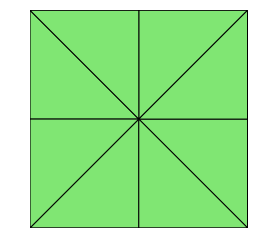

In [11]:
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
#tmesh.find_node(axes, showindex=True)
#tmesh.find_edge(axes, showindex=True)
#tmesh.find_cell(axes, showindex=True)
plt.show()

In [10]:
from fealpy.mesh.mesh_tools import unique_row
print(tmesh.ds.total_edge())
totalEdge = tmesh.ds.total_edge()
edge, i0, j = unique_row(totalEdge)
print(edge, i0, j)

[[0 2]
 [0 1]
 [1 2]
 [0 2]
 [2 3]
 [0 3]]
[[0 1]
 [0 2]
 [0 3]
 [1 2]
 [2 3]] [1 0 5 2 4] [1 0 3 1 4 2]


## 网格生成

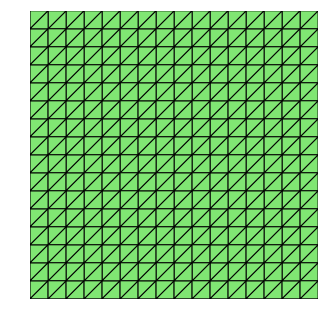

In [4]:
from fealpy.mesh.simple_mesh_generator import squaremesh
tmesh = squaremesh(0, 1, 0, 1, r=4)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

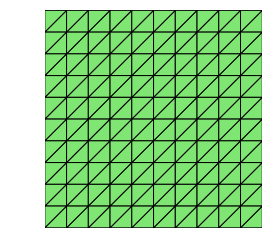

In [5]:
from fealpy.mesh.simple_mesh_generator import rectangledomainmesh
box = [-1, 1, -1, 1]
# the meshtype can be tri, quad, polygon
mesh = rectangledomainmesh(box, nx=10, ny=10, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

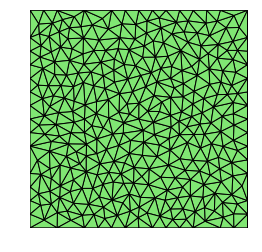

In [7]:
from fealpy.mesh.simple_mesh_generator import triangle
mesh = triangle([0, 1, 0, 1], 0.05, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

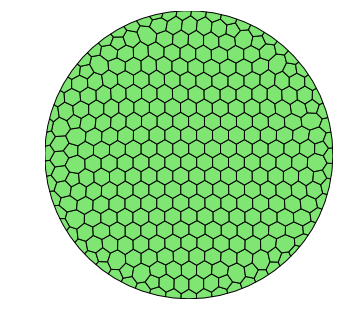

In [13]:
from fealpy.mesh.simple_mesh_generator import unitcircledomainmesh
mesh = unitcircledomainmesh(0.1, meshtype='polygon')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig('/home/why/cpolygonmesh.pdf')
plt.show()

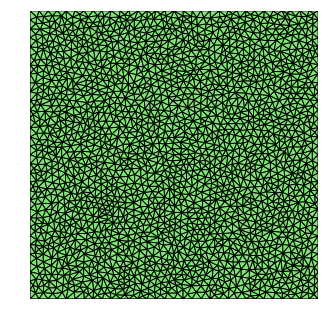

In [4]:
import numpy as np
from fealpy.mesh.simple_mesh_generator import triangle
box = [0, 1, 0, 1]
h = 0.02
tmesh = triangle(box, h)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

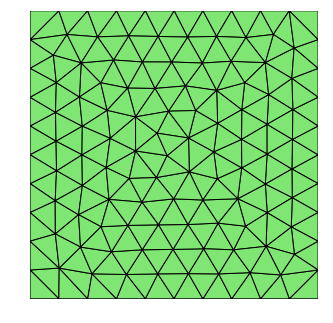

In [5]:
import numpy as np
from fealpy.mesh.meshio import load_mat_mesh
tmesh = load_mat_mesh('/home/why/fealpy/data/square1.mat')
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

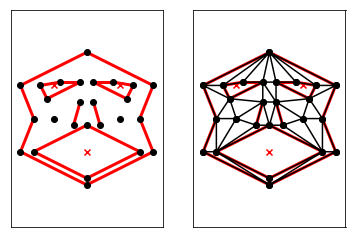

In [15]:
import triangle
import triangle.plot as plot
import matplotlib.pyplot as plt

face = triangle.get_data('face')
ax1 = plt.subplot(121, aspect='equal')
plot.plot(ax1, **face)

t = triangle.triangulate(face, 'p')

ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
triangle.plot.plot(ax2, **t)

plt.show()

In [ ]:
import triangle
import triangle.plot as plot
import matplotlib.pyplot as plt

A = triangle.get_data('A')
t = triangle.triangulate(A, 'pq30')
plot.plot(plt.axes(), **t)
plt.show()
print(A)

In [ ]:
import triangle
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

from fealpy.mesh.TriangleMesh import TriangleMesh
%matplotlib inline

verts = np.array([
        [-4, -4], [0, -4], [4, -4], [4, 0], 
        [4, 4], [0, 4], [-4, 4], [-4, 0],
        [0, -3], [3, 0], [0, 3], [-3, 0],
        [0, -2.39], [0, 2.39]
    ], dtype=np.float)
segs = np.array([
        [0, 1], [1, 2], [2, 3], [3, 4],[4, 5],[5, 6], [6, 7], [7, 0],
        [1, 8], [3, 9], [5, 10], [7, 11], [8, 9], [9, 10], [10, 11], 
        [11,8], [12,11], [11, 13], [13, 9], [9, 12], [10, 13], [8, 12]
    ], dtype=np.int)
holes = np.array([[0, 0]], dtype=np.float)

plsg = {'segments':segs, 'vertices':verts, 'holes':holes}
t = triangle.triangulate(plsg, 'pq30a0.1')
tmesh = TriangleMesh(t['vertices'], t['triangles'])
tmesh.uniform_refine(2)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
data = {
        'node':tmesh.point, 
        'elem':tmesh.ds.cell + 1
        }
sio.matlab.savemat('trimesh', data)
plt.show()

In [ ]:
1/16

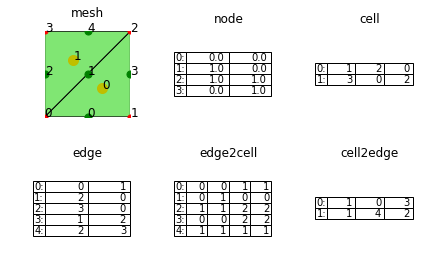

In [2]:
import numpy as np
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
node = np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)
cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)
tmesh = TriangleMesh(node, cell) # 三角形网格实例
fig, axes = plt.subplots(2, 3)
tmesh.add_plot(axes[0, 0])
tmesh.find_node(axes[0, 0], showindex=True, markersize=25, fontsize=12)
tmesh.find_edge(axes[0, 0], showindex=True, markersize=50, fontsize=12)
tmesh.find_cell(axes[0, 0], showindex=True, markersize=100, fontsize=12)
axes[0, 0].set_title('mesh', y=1.1)

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[0, 1].table(cellText=node, rowLabels=['0:', '1:', '2:', '3:'], loc='center')
axes[0, 1].set_title('node')
axes[0, 2].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[0, 2].set_title('cell')
axes[1, 0].table(cellText=tmesh.ds.edge, rowLabels=['0:', '1:', '2:', '3:', '4:'],  loc='center')
axes[1, 0].set_title('edge')
axes[1, 1].table(cellText=tmesh.ds.edge2cell, rowLabels=['0:', '1:', '2:', '3:', '4:'],  loc='center')
axes[1, 1].set_title('edge2cell')
axes[1, 2].table(cellText=tmesh.ds.cell_to_edge(), rowLabels=['0:', '1:'],  loc='center')
axes[1, 2].set_title('cell2edge')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/edgedata1.pdf')
plt.show()

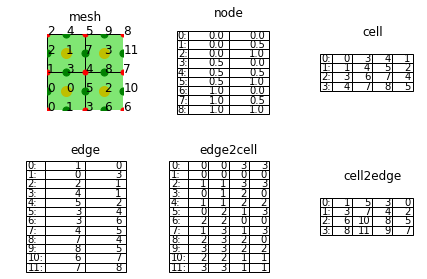

In [3]:
import numpy as np
from fealpy.mesh.simple_mesh_generator import rectangledomainmesh
import matplotlib.pyplot as plt 
%matplotlib inline

def label(N):
    label = []
    for i in range(N):
        label.append('{}:'.format(i))
    return label

box = [0, 1, 0, 1]
mesh = rectangledomainmesh(box, nx=2, ny=2, meshtype='quad')
node = mesh.entity('node')
edge = mesh.entity('edge')
cell = mesh.entity('cell')

fig, axes = plt.subplots(2, 3)
mesh.add_plot(axes[0, 0])
mesh.find_node(axes[0, 0], showindex=True, markersize=25, fontsize=12)
mesh.find_edge(axes[0, 0], showindex=True, markersize=50, fontsize=12)
mesh.find_cell(axes[0, 0], showindex=True, markersize=100, fontsize=12)
axes[0, 0].set_title('mesh', y=1.1)

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[0, 1].table(cellText=node,  rowLabels=label(len(node)),loc='center')
axes[0, 1].set_title('node', y=1.15)
axes[0, 2].table(cellText=cell, rowLabels=label(len(cell)), loc='center')
axes[0, 2].set_title('cell', y=0.9)
axes[1, 0].table(cellText=edge, rowLabels=label(len(edge)),  loc='center')
axes[1, 0].set_title('edge', y=1.25)
axes[1, 1].table(cellText=mesh.ds.edge_to_cell(), rowLabels=label(len(edge)),  loc='center')
axes[1, 1].set_title('edge2cell', y=1.25)
axes[1, 2].table(cellText=mesh.ds.cell_to_edge(), rowLabels=label(len(cell)),  loc='center')
axes[1, 2].set_title('cell2edge', y=0.9)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/quadmesh.pdf')
plt.show()

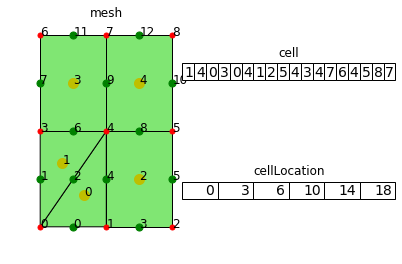

In [5]:
-

AttributeError: 'TetrahedronMesh' object has no attribute 'find_point'

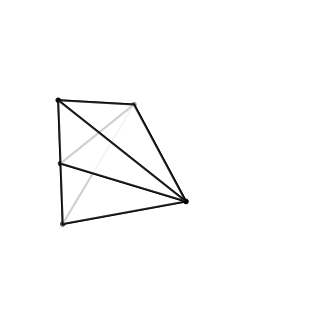

In [6]:
import numpy as np
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl

from fealpy.mesh.TetrahedronMesh import TetrahedronMesh

ax1 = a3.Axes3D(pl.figure())

point = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0,-1]], dtype=np.float)

cell = np.array([
    [0, 1, 2, 3],
    [0, 2, 1, 4]], dtype=np.int)

mesh = TetrahedronMesh(point, cell)
mesh.add_plot(ax1)
mesh.find_point(ax1, showindex=True, markersize=25, fontsize=12)
mesh.find_edge(ax1, showindex=True, markersize=25, fontsize=12)
mesh.find_face(ax1, showindex=True, markersize=25, fontsize=12)
mesh.find_cell(ax1, showindex=True, markersize=25, fontsize=12)
mesh.print()
pl.show()

In [ ]:
import numpy as np
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl

from fealpy.mesh.TetrahedronMesh import TetrahedronMesh
from fealpy.mesh.vtkMeshIO import write_vtk_mesh




#point = np.array([
#    [0, 0, 0],
#    [1, 0, 0],
#    [0, 1, 0],
#    [0, 0, 1]], dtype=np.float)
#
#cell = np.array([
#    [0, 1, 2, 3]], dtype=np.int)

point = np.array([
    [-1,-1,-1],
    [ 1,-1,-1], 
    [ 1, 1,-1],
    [-1, 1,-1],
    [-1,-1, 1],
    [ 1,-1, 1], 
    [ 1, 1, 1],
    [-1, 1, 1]], dtype=np.float) 

cell = np.array([
    [0,1,2,6],
    [0,5,1,6],
    [0,4,5,6],
    [0,7,4,6],
    [0,3,7,6],
    [0,2,3,6]], dtype=np.int)

mesh = TetrahedronMesh(point, cell)
for i in range(3):
    angle = mesh.dihedral_angle()
    print("max:", np.max(angle))
    print("min:", np.min(angle))
    mesh.uniform_refine()
    
write_vtk_mesh(mesh, '/home/why/test.vtk')

ax0 = a3.Axes3D(pl.figure())
mesh.add_plot(ax0)
pl.show()
